<a href="https://colab.research.google.com/github/vassa33/alu-machine_learning/blob/main/diabetes_prediction_system/notebook/diabetes_prediction_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Diabetes Prediction System**

In [ ]:
# Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

import joblib  # for saving and loading models

In [ ]:
#Load data
df = pd.read_csv('diabetes.csv')

## **Data Preprocessing**

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# Quick summary statistics of the dataset
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
#Find any duplicated rows
duplicate_rows = df[df.duplicated()]
duplicate_rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome


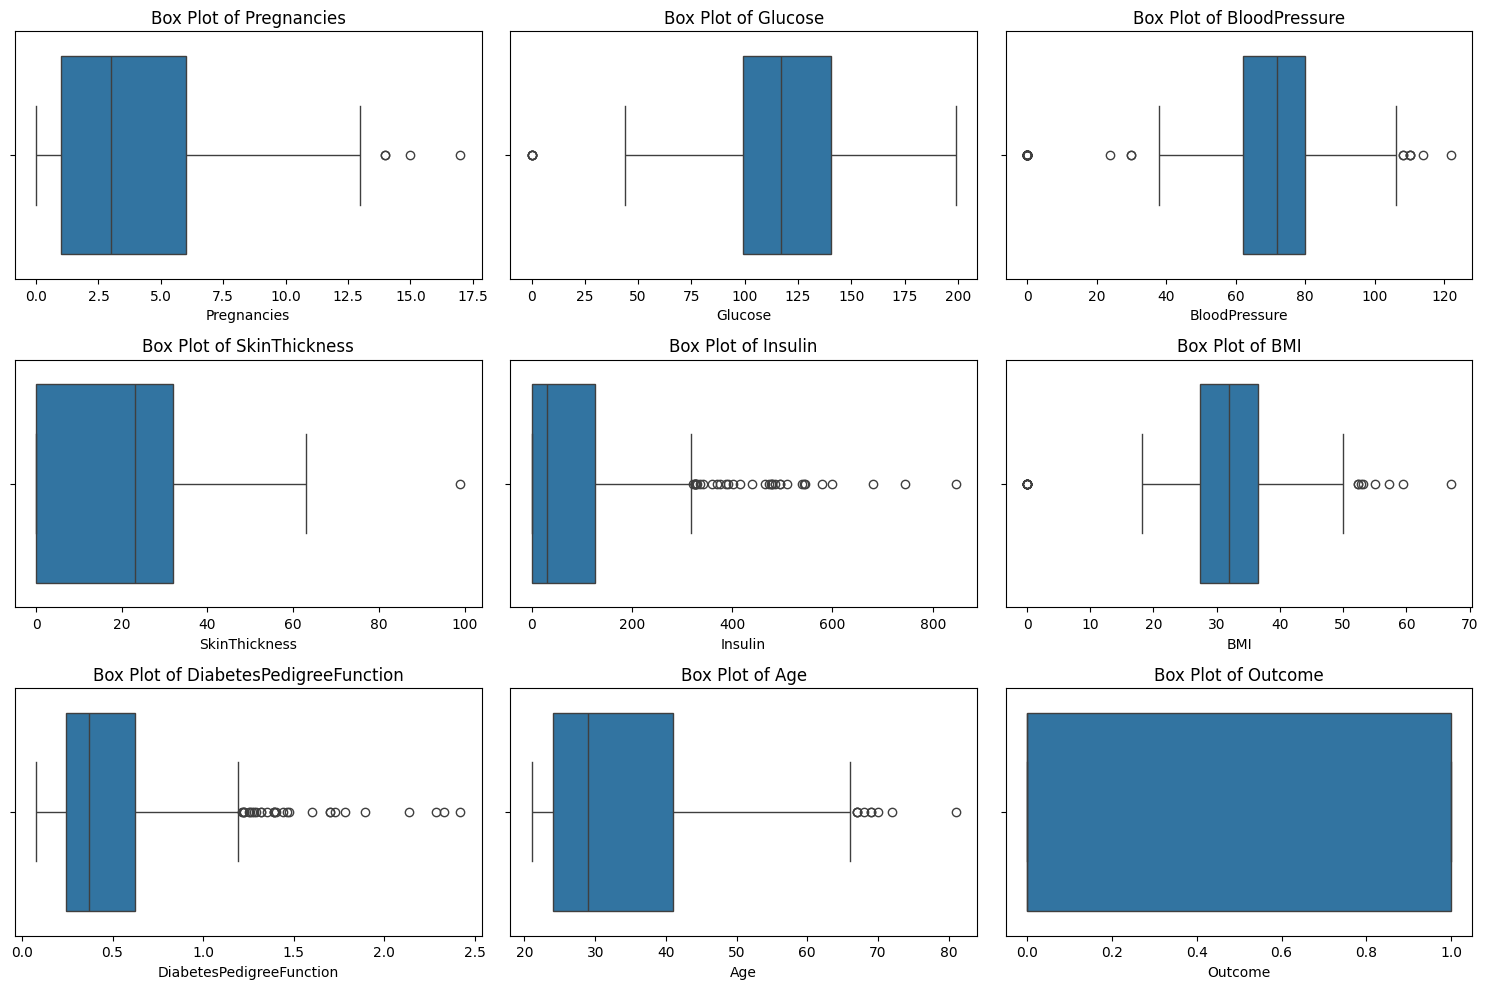

In [ ]:
# Find Outliers in the dataset

# Set up the figure and axes
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))

# Flatten the axes for easier iteration
axes = axes.flatten()

# Plot box plots for each numerical column
for i, column in enumerate(df.columns):
    if df[column].dtype != 'object':  # Exclude non-numerical columns
        sns.boxplot(x=df[column], ax=axes[i])
        axes[i].set_title(f'Box Plot of {column}')

# Adjust layout
plt.tight_layout()
plt.show()


From the Box plots, this dataset has outliers shown by the dots outside the whiskers.

 **Outliers** in medical datasets like this Diabetes dataset can represent extreme but genuine physiological conditions. By including these outliers, it ensures that our model is exposed to a wide range of scenarios, enhancing its ability to generalize to real-world situations.

## **Feature Selection**

In [ ]:
# Separate the Data and the label
x = df.drop(columns = 'Outcome', axis=1) # Features
y = df['Outcome'] # Label (Target variable)

# Standardize the data
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)

x = standardized_data


## **Model Training**

In [ ]:
# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

# Initialize the Random Forest Classifier
# n_estimators = number of decision trees that will be included in the ensemble
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the Random Forest Classifier on the training data
rf_classifier.fit(x_train, y_train)

# Predict the target variable on the testing data
y_pred = rf_classifier.predict(x_test)

if (y_pred[0] == 0):
  print('You are Not Diabetic')
else:
  print('You are Diabetic')

You are Not Diabetic


## **Model Evaluation**

In [ ]:
# Calculate accuracy scores for training and testing sets
train_accuracy = accuracy_score(y_train, rf_classifier.predict(x_train))
test_accuracy = accuracy_score(y_test, y_pred)

# Print accuracy scores
print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", test_accuracy)

Training Accuracy: 1.0
Testing Accuracy: 0.7272727272727273


## **Save Trained Model**

In [ ]:
# Save the trained model
joblib.dump(rf_classifier, 'diabetes_model.pkl')

['diabetes_model.pkl']

In [ ]:
# Load the saved model
loaded_model = joblib.load('diabetes_model.pkl')
loaded_model

RandomForestClassifier(random_state=42)